# CS530 Data Mining Homework 5

In [228]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

#### Question 1

a. Read in the dataset ‘zip.train’ using the pandas ‘read_csv’ function. Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of the function to find the right parameters to properly read in this dataset. You might want to open the dataset in a text editor to inspect its structure.

In [229]:
# Your code goes here
zip = pd.read_csv("zip.train", sep= " ")

#you can change this value to see the pca and plots of different digits
digit = 3

b. This dataset contains handwritten digits from 0 to 9. The first column contains the label (0-9) of each record. Each digit has 256 columns, each representing a pixel in a 16x16 image. Choose one row, use the ‘reshape’ function in numpy to reshape the row vector to 16x16, and use matplotlib to visualize the image.

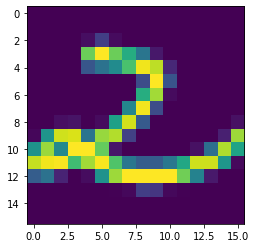

In [230]:
def compressImage(zip, selectedLocation):
    if len(zip.columns) > 256:
        zip = zip.iloc[selectedLocation, 1:257]
    else:
        zip = zip.iloc[selectedLocation]
        
    zip = np.array(zip)
    zip = np.reshape(zip, (16, 16))
    return zip

#change row value to visualize another image
row = 222

plt.imshow(compressImage(zip, row)) 
plt.show()

c. Select a subset of the dataset with one digit of your choice. Perform PCA on the subset and show the percentage of variance you keep with 2 principle components. (You might want to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) to see how to properly fit and transform the dataset using scikit-learn.)

In [231]:
def selectSubsetWithDigit(digit, zip):
    zip = zip[zip.iloc[:, 0] == digit]
    zip = zip.iloc[:, 1:257]
    return zip


def getPercentageOfVariance(X):
    pca = PCA(n_components = 2)
    pca.fit(X)
    X.shape
    pca.components_
    return pca.explained_variance_ratio_

subset = selectSubsetWithDigit(digit, zip)
X = np.array(subset)

print("PERCENTAGE OF VARIANCE: ", getPercentageOfVariance(X))

PERCENTAGE OF VARIANCE:  [0.12666612 0.08798362]


d. Plot a scatter plot of the data with the first two principal components. Find 25 records as is shown in the figure below (the red circles approximately constitute a 5x5 grid). Reshape them into images and plot them accordingly (as 5x5 [subplots](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.subplot.html)).

![plot](plot.png)

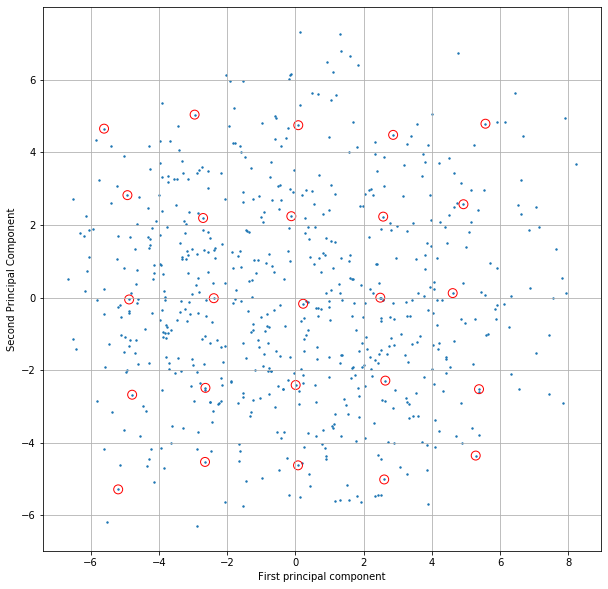

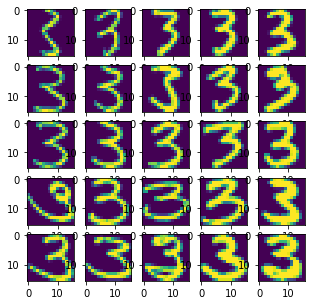

In [232]:
import random
from scipy.spatial import distance

def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)
    return np.argmin(dist_2)

def plotPCA(X, components = 2):
    
    pca = PCA(components)
    pca.fit(X)
    x_pca = pca.transform(X)
    plt.figure(figsize=(10,10))

    plt.scatter(x_pca[:,0],x_pca[:,1], s=2)
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')
    plt.grid()
    
    indexes = []
    
    for i in np.arange(-5, 6, 2.5):
        for j in np.arange(-5, 6, 2.5):
            distanceArray = []
            for point in x_pca:
                euclideanDistance = distance.euclidean((i,j), point)
                distanceArray.append(euclideanDistance)
            indexes.append(distanceArray.index(min(distanceArray)))

            x, y = x_pca[distanceArray.index(min(distanceArray))]
            
            plt.scatter(x,y,s=80, facecolors='none', edgecolors='r')
            
    return indexes

def createImageSubplots(subset, indexes):
    fig=plt.figure(figsize=(5, 5))
    columns = 5
    rows = 5
    index = 0
    for i in range(1, columns*rows +1):
        img = compressImage(subset, indexes[index])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        index += 1
    plt.show()

indexes = plotPCA(X,2)  

createImageSubplots(subset, indexes)

e. Discuss what you see in the 5x5 image plot. What do you think are the features that the two principle components are capturing?

It looks like the two principle components are capturing the variances between the way the numbers are written perhaps primarily based on boldness and size. you can see that their is pattern in the subplot, no matter which digit you choose to plot, where the numbers gradually become bolder and wider. They go from thin to very bold and also skinnier and smaller written numbers to wider and larger written numbers